In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

import seaborn as sns
import scipy.stats

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.weightstats import ztest

In [7]:
df = pd.read_csv("D:/PYTN 098/nyc-rolling-sales.csv")
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [9]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [10]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
df['SALE PRICE'] = df['SALE PRICE'].str.replace('-','0')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])
df['SALE PRICE'].head()

0    6625000
1          0
2          0
3    3936272
4    8000000
Name: SALE PRICE, dtype: int64

DESCRIPTIVE

In [13]:
df['SALE PRICE'].mean()

1056622.9941453375

In [14]:
df['SALE PRICE'].median()

415000.0

In [15]:
df['SALE PRICE'].mode()

0    0
Name: SALE PRICE, dtype: int64

In [30]:
def hist_sale(data, label="", labely="", labelx="", size=(12,6)):
  freq, bin_edges = np.histogram(data)
  data.plot(kind="hist", figsize=size)
  plt.xticks(bin_edges)

  plt.title(label)
  plt.ylabel(labely)
  plt.xlabel(labelx)

  plt.show()

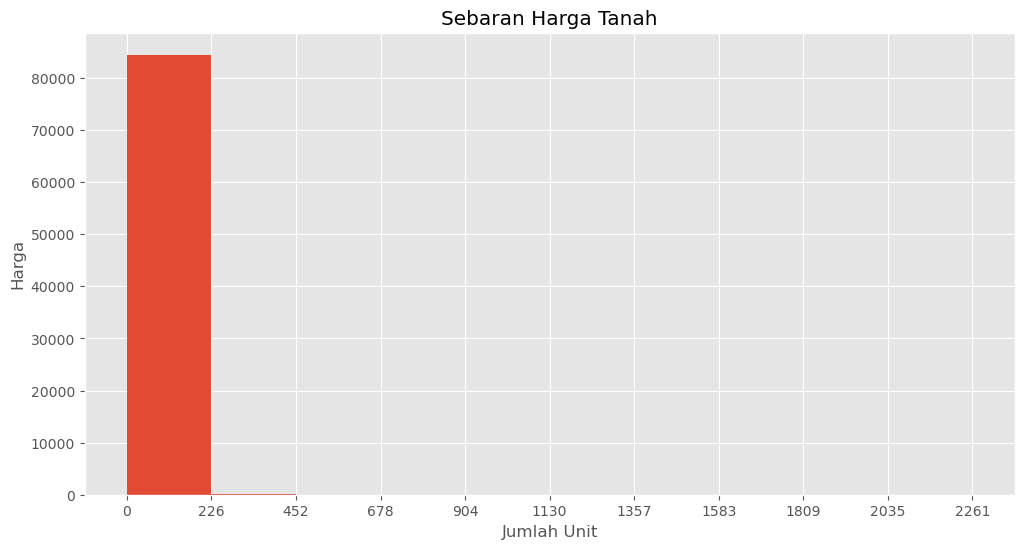

In [34]:
hist_sale(df["TOTAL UNITS"], label="Sebaran Harga Tanah", labely="Harga", labelx="Jumlah Unit")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [36]:
df["SALE PRICE"].std()

10387939.932833659

In [38]:
print("min", df["SALE PRICE"].min())
print("max", df["SALE PRICE"].max())
print("range", df["SALE PRICE"].max() - df["SALE PRICE"].min())

min 0
max 2210000000
range 2210000000


In [40]:
df[["SALE PRICE"]].quantile([0.25, 0.50, 0.75])

,SALE PRICE
0.25,0.0
0.50,415000.0
0.75,830000.0


In [45]:
df["SALE PRICE"].quantile([0.25, 0.50, 0.75])

0.25         0.0
0.50    415000.0
0.75    830000.0
Name: SALE PRICE, dtype: float64

In [46]:
[q1, q2, q3] = df["SALE PRICE"].quantile([0.25, 0.50, 0.75])
print(q1, q2, q3)

0.0 415000.0 830000.0


In [47]:
iqr = q3-q1
print("IQR", iqr)

IQR 830000.0


In [48]:
print("MAX IQR", q3 + 1.5*iqr)
print("MIN IQR", q1 - 1.5*iqr)

MAX IQR 2075000.0
MIN IQR -1245000.0


In [49]:
df[["TOTAL UNITS","SALE PRICE"]]

,TOTAL UNITS,SALE PRICE
0,5,6625000
1,31,0
2,17,0
3,10,3936272
4,6,8000000
...,...,...
84543,2,450000
84544,2,550000
84545,2,460000
84546,7,11693337


In [51]:
df[["TOTAL UNITS","SALE PRICE"]].corr()

,TOTAL UNITS,SALE PRICE
TOTAL UNITS,1.000000,0.102689
SALE PRICE,0.102689,1.000000


<Axes: xlabel='TOTAL UNITS', ylabel='SALE PRICE'>

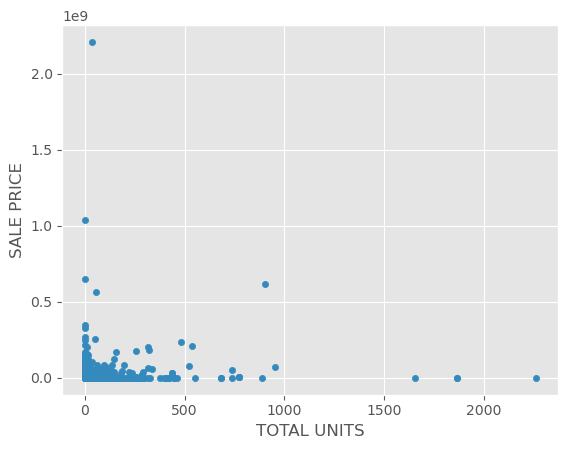

In [53]:
df[["TOTAL UNITS","SALE PRICE"]].plot(kind="scatter", x="TOTAL UNITS", y="SALE PRICE")

INFERENTIAL

In [62]:
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].str.replace('-','0')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'])

In [63]:
from statsmodels.stats.weightstats import ztest

x1 = df["LAND SQUARE FEET"]
x2 = df["GROSS SQUARE FEET"]

value = x1.mean() - x2.mean()

ztest(x1, x2, value, alternative='two-sided')

(0.0, 1.0)

In [64]:
tstat, pvalue = ztest(x1, x2, value, alternative='two-sided')

print("p-value:", pvalue)

alpha = 0.05

if (pvalue < alpha):
  print("REJECT null hypothesis")
else:
  print("Fail to Reject null hypothesis")

p-value: 1.0
Fail to Reject null hypothesis
